<a href="https://colab.research.google.com/github/hejiang2/datacamp-courses/blob/master/ARIMA_Models_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

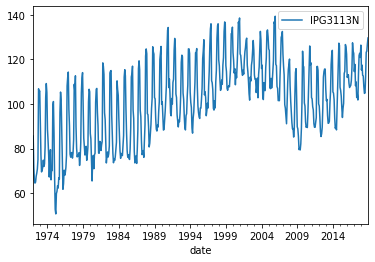

In [1]:
candy_url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/ARIMA%20Models%20in%20Python/candy_production.csv'
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv(candy_url, 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

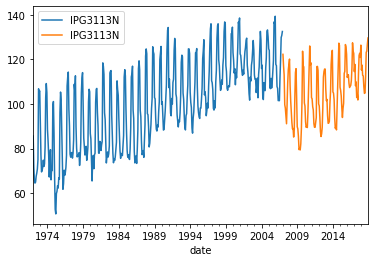

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/ARIMA%20Models%20in%20Python/milk_production.csv'
# Load in the time series
milk_production = pd.read_csv(url, index_col='date', parse_dates=True)
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


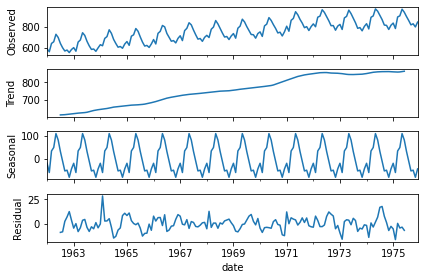

In [4]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production.pounds_per_cow, 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

You have extracted the seasonal cycle and now you can see the trend much more clearly.

In [5]:
co2_url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/ARIMA%20Models%20in%20Python/co2.csv'
# Load in the time series
co2 = pd.read_csv(co2_url, 
            index_col='date',
            parse_dates=True)

In [6]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend='c')
# Fit model
results = model.fit()

results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Thu, 27 Aug 2020   AIC                            369.437
Time:                                    20:16:26   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.075      0.002       0.088       0.395
ma.L1         -0.6081      0.065     -9.297      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.500      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.747      0.000       0.086       0.103
===================================================================================
Ljung-Box (Q):                       46.99   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.21   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

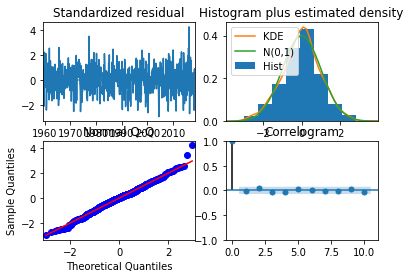

In [7]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

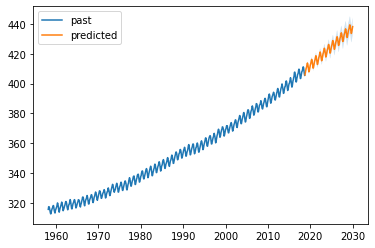

In [8]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [9]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1950947128102
lower CO2_ppm    432.111725
upper CO2_ppm    444.278464
Name: 2030-01-01 00:00:00, dtype: float64
